In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

np.random.seed(seed=330)

## Creación y graficación de Base de Datos sintética

In [2]:
nu = 200
C1 = np.random.randn(nu,2)
C2 = np.random.randn(nu-5,2)+[3,3]

X = np.vstack((C1,C2))
y = np.vstack((np.zeros((nu,1)),np.ones((nu-5,1))))
print(X.shape)
print(y.shape)
print(y.squeeze().shape)

(395, 2)
(395, 1)
(395,)


<IPython.core.display.Javascript object>


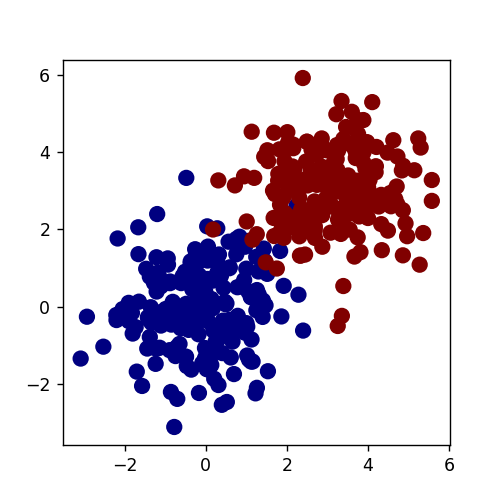

In [3]:
fig = plt.figure(figsize=(4.0, 4))
ax = fig.add_subplot(111)

ax.scatter(X[:,0],X[:,1],s=70,c=y.squeeze(),cmap='jet')

# Regresión lineal para clasificación (Clasificador Geométrico)

## Grafiquemos los datos como graficabamos en regresión (eje $x$ es característica, eje $y$ etiquetas)

<IPython.core.display.Javascript object>


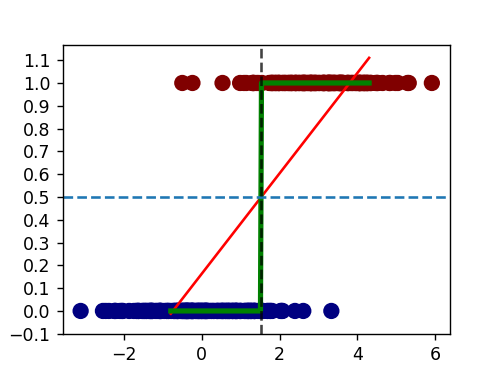

In [7]:
fig = plt.figure(figsize=(4.0, 3))
ax = fig.add_subplot(111)

ax.scatter(X[:,1],y,s=70,cmap='jet',c=y.squeeze())


o = np.ones(X.shape[0])
X1 = np.stack((o,X[:,1]),axis = 1)

inv = np.linalg.inv(np.matmul(X1.T,X1))
w = np.matmul(np.matmul(inv,X1.T,),y)


t = np.linspace(-0.8,4.3,200)
G = np.stack((np.ones(200),t),axis = 1)
ax.plot(t,np.matmul(G,w),'r')
ax.plot(t,np.matmul(G,w)>0.5,'g', linewidth =3)
ax.axhline(0.5,linestyle='--')
ax.axvline(1.528366,linestyle='--',color='k',alpha=0.74)
ax.set_yticks(np.arange(-0.1, 1.1, step=0.1));

## Regresión Logística

### Sigmoide

<IPython.core.display.Javascript object>


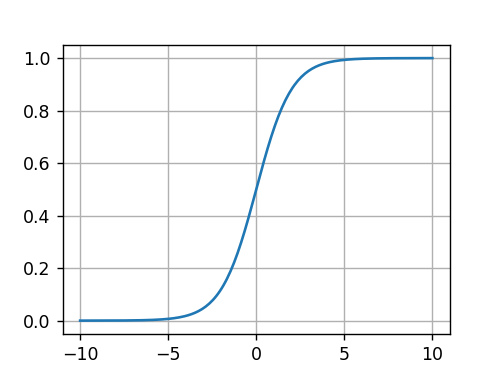

In [8]:
sig = lambda x: 1/(1+np.exp(-x))

t = np.linspace(-10,10,200)
figs = plt.figure(figsize=(4,3))
axs = figs.add_subplot(111)
axs.plot(t,sig(t))
axs.grid(True)

In [ ]:
w_rl = 100*np.random.rand(3,1)
t_rl = np.linspace(-3,6,200)

alpha = 0.01
Graficar = True
o = np.ones(200)
X1 = np.stack((o,t_rl,t_rl),axis = 1)


fig2 = plt.figure(figsize=(6,4.5))
ax = fig2.add_subplot(111)
ax.scatter(X[:,0],X[:,1],s=70,c=y.squeeze(),cmap='jet')
fig2.canvas.draw()

sig = lambda x: 1/(1+np.exp(-x))
X_rl = np.hstack((np.ones((X.shape[0],1)), X))

for i in range(402):
    z = X_rl@w_rl
    a = sig(z)
    w_rl = w_rl - alpha*X_rl.T@(a - y)
    
    if (i%50 == 1 and Graficar):
        ax.set_ylim(-3.5,6.5)
        ax.plot(t_rl,(-X1[:,0]*w_rl[0]-X1[:,1]*w_rl[1])/w_rl[2])
        fig2.canvas.draw()
        plt.pause(1)
        
ax.cla()
ax.set_ylim(-3.5,6.5)
ax.scatter(X[:,0],X[:,1],s=70,c=y.squeeze(),cmap='jet')
ax.plot(t_rl,(-X1[:,0]*w_rl[0]-X1[:,1]*w_rl[1])/w_rl[2])
fig2.canvas.draw()

In [ ]:
fig4 = plt.figure(figsize=(4, 3))
ax4 = fig4.add_subplot(111)

ax4.scatter(X[:,1],y,s=70,cmap='jet')

ax4.plot(t,sig(X1@w_rl),'r')
ax4.axhline(0.5,linestyle='--')
ax4.set_yticks(np.arange(-0.1, 1.1, step=0.1))
fig4.canvas.draw()

In [ ]:
w_rl = 100*np.random.rand(3,1)
t_rl = np.linspace(-3,6,200)

alpha = 0.01
Graficar = True
o = np.ones(200)
X1 = np.stack((o,t_rl,t_rl),axis = 1)


fig2 = plt.figure(figsize=(6.0, 4.8))
ax = fig2.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],y,s=70,c=y.squeeze(),cmap='jet')
fig2.canvas.draw()

sig = lambda x: 1/(1+np.exp(-x))
X_rl = np.hstack((np.ones((X.shape[0],1)), X))

for i in range(402):
    z = X_rl@w_rl
    a = sig(z)
    w_rl = w_rl - alpha*X_rl.T@(a - y)
    X1_, X2_ = np.meshgrid(t_rl,t_rl)
    X1 = X1_.flatten()
    X2 = X2_.flatten()
    XY = np.stack((np.ones(len(X1)),X1,X2),axis = 1)
    
    if (i%10 == 1 and Graficar):
        WW = XY@w_rl
        P1 = np.reshape(sig(WW),X1_.shape)
        ax.view_init(elev=20, azim=-60)
        # ax.plot_wireframe(X1_,X2_,P1,rstride=10,cstride=10,alpha=0.5)
        srf = ax.plot_surface(X1_,X2_,P1,rstride=10,cstride=10,alpha=0.4)
        plt.pause(0.3)
        fig2.canvas.draw()
        srf.remove()
        
WW = XY@w_rl
P1 = np.reshape(sig(WW),X1_.shape)
ax.plot_surface(X1_,X2_,P1,rstride=10,cstride=10,alpha=0.4)


In [ ]:
fig = plt.figure(figsize=(6, 4.0))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0],X[:,1],y,s=70,cmap='jet', c=y.squeeze())

t_rl = np.linspace(-3,6,200)
X1_, X2_ = np.meshgrid(t_rl,t_rl)
X1 = X1_.flatten()
X2 = X2_.flatten()

XY = np.stack((np.ones(len(X1)),X1,X2),axis = 1)
WW = XY@w_rl
P1 = np.reshape(sig(WW),X1_.shape)

# ax.plot_wireframe(X1_,X2_,P1,rstride=10,cstride=10,alpha=0.5)
ax.plot_surface(X1_,X2_,P1,rstride=10,cstride=10,alpha=0.4)
